In [1]:
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the catalogs and read them
# indir = "D:/HessCTA/Summer School 0624/Python/"
indir = "./"
gamfile = "gll_psc_v31.fit"   # 4FGL-DR3
ctptfile = "SUMSS_VIII_81B.fits"
sra = "RAJ2000"
sdec = "DEJ2000"
sid = "recno"
sflux = 'St'
gamcat = Table.read(indir+gamfile, hdu=1)
# Eliminate sources with invalid localization, like extended sources
valid = np.nonzero(np.logical_not(gamcat['Conf_95_SemiMajor'].mask))[0]
print("gamma catalog:", len(valid), "entries with valid localization among", len(gamcat))
gamcat = gamcat[valid]
ctptcat = Table.read(indir+ctptfile, hdu=1)
print("counterpart catalog:", len(ctptcat), "entries")
# Set coordinate units (absent in the FITS file)
for colname in (sra,sdec):
  ctptcat[colname].unit = "deg"

gamma catalog: 6579 entries with valid localization among 6659
counterpart catalog: 211050 entries


In [3]:
# Get Galactic coordinates
ctptdir = SkyCoord(ra=ctptcat[sra], dec=ctptcat[sdec])
galdir = ctptdir.galactic

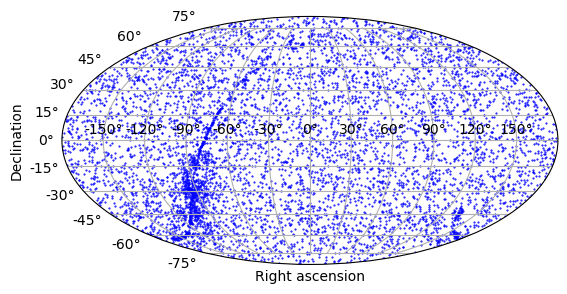

In [4]:
# Show gamma-ray source positions in the sky
# Note that the RA axis is not inverted
ra = np.mod(gamcat[sra]+180,360) - 180
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide' ) # or hammer, aitoff, ...
ax.scatter(np.radians(ra), np.radians(gamcat[sdec]), marker='.', s=1, color='b')
ax.grid(True)
plt.xlabel('Right ascension')
plt.ylabel('Declination')
plt.show()

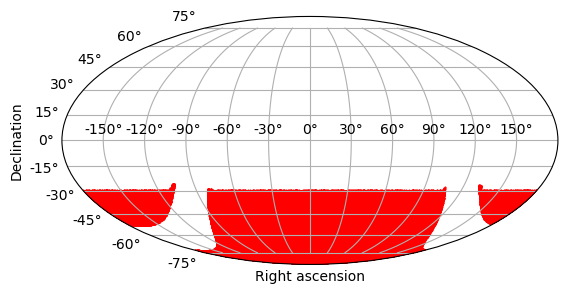

In [5]:
# Show counterpart source positions in the sky
ra2 = np.mod(ctptcat[sra]+180,360) - 180
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide' ) # or hammer, aitoff, ...
ax.scatter(np.radians(ra2), np.radians(ctptcat[sdec]), marker='.', s=1, color='r')
ax.grid(True)
plt.xlabel('Right ascension')
plt.ylabel('Declination')
plt.show()

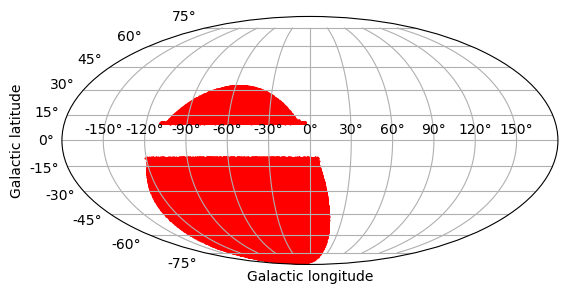

In [6]:
# Check counterpart source positions in Galactic coordinates as well
glon2 = np.mod(galdir.l.degree+180,360) - 180
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide' ) # or hammer, aitoff, ...
ax.scatter(np.radians(glon2), galdir.b.radian, marker='.', s=1, color='r')
ax.grid(True)
plt.xlabel('Galactic longitude')
plt.ylabel('Galactic latitude')
plt.show()

In [7]:
# Avoid regions close to the Galactic plane
ctpthighlat = np.nonzero(np.abs(ra2) < 70)[0]
# Check density vs declination and what happens at -50°


In [8]:
# Check minimum source flux above and below -50°
lowdec = np.nonzero(ctptcat[sdec] < -55)[0]
middec = np.nonzero(ctptcat[sdec] > -45)[0]
print("delta < -55°: Flux between", np.min(ctptcat[lowdec][sflux]), np.max(ctptcat[lowdec][sflux]), "mJy")
print("delta > -45°: Flux between", np.min(ctptcat[middec][sflux]), np.max(ctptcat[middec][sflux]), "mJy")

delta < -55°: Flux between 6.0 25055.4 mJy
delta > -45°: Flux between 10.0 342000.0 mJy


In [9]:
# Force same detection limit everywhere
fluxmin = 15
notfaint = np.nonzero(ctptcat[sflux] > fluxmin)[0]
ncat2 = len(notfaint)
print(ncat2, "counterparts above", fluxmin,"mJy")
ctptcat2 = ctptcat[notfaint]

140111 counterparts above 15 mJy


In [10]:
# Aoiding regions close to the Galactic plane
decmax = -30
ctpthighlat = np.nonzero(np.logical_and(np.abs(ra2[notfaint]) < 70, ctptcat2[sdec] < decmax))[0]
# Check density vs declination and what happens at -50° again


In [11]:
# Deduce average source density

rho = 17    # This is a placeholder
print("Counterpart density =", rho, " per square degree")

Counterpart density = 17  per square degree


In [12]:
# Select gamma sources at high latitude, declination below -30°
highlat = np.nonzero(np.logical_and(np.abs(gamcat['GLAT']) > 10, gamcat[sdec] < decmax))[0]
nhighlat = len(highlat)
print("Gamma sources at |b| > 10° and dec <", decmax, ":", nhighlat)
gamcath = gamcat[highlat]

Gamma sources at |b| > 10° and dec < -30 : 1169


In [13]:
# Get closest neighbor
gamdir = SkyCoord(ra=gamcath[sra], dec=gamcath[sdec])
idx, d2d, d3d = gamdir.match_to_catalog_sky(ctptdir[notfaint])
print("First match:",gamcath[0]['Source_Name'],ctptcat[notfaint[idx[0]]][sid])

First match: 4FGL J0000.3-7355  115


In [14]:
f95 = np.sqrt(-2*np.log(0.05))
print("f95 =", f95)
# Replace error ellipses by circles for simplicity
gamlocerr = np.sqrt(gamcath['Conf_95_SemiMajor']*gamcath['Conf_95_SemiMinor']) / f95
# Check the median localization error
medgamlocerr = np.median(gamlocerr)
print("Median gamma localization error:", medgamlocerr*60, " arcmin")

f95 = 2.4477468306808166
Median gamma localization error: 1.4774658903479576  arcmin


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [15]:
# Redo the standard association as in the SourceAssoc notebook


In [16]:
# Get the number of sources above each source flux and deduce density rho2 for each source


In [17]:
# Find all neighbors within 0.5 deg (expect more than 10 on average)

# idx1, idx2, d2dall, d3d = search_around_sky(gamdir, cat2dir, 0.5*u.degree)
# print(len(idx1), "pairs within 0.5 degrees")

In [18]:
# compute LR for all pairs LRall


In [19]:
# Sort by decreasing LRall and select the best one LRbest

# Plot the histogram of log10(likelihood ratio) values


In [20]:
# Simulate a large number of gamma-ray sources randomly
nrand = 50000
rng = np.random.default_rng()


In [21]:
# Proceed as before for the random positions, deduce best LR LRbr


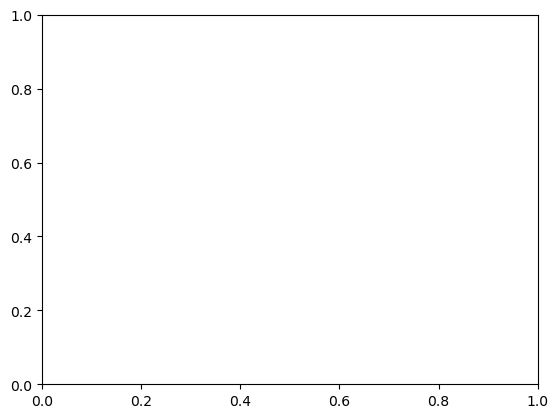

In [23]:
# Plot the density histograms of likelihood ratio values
fig = plt.figure()
ax = fig.add_subplot(111)
# counts, bins, patches = ax.hist((np.log10(LRbest[LRbest>1e-5]), np.log10(LRbr[LRbr>1e-5])), 
#                                 density=True, bins=100, label=('True','Random'))
# ax.legend()
# h = plt.xlabel('log10(LR)')
# print(counts.shape)

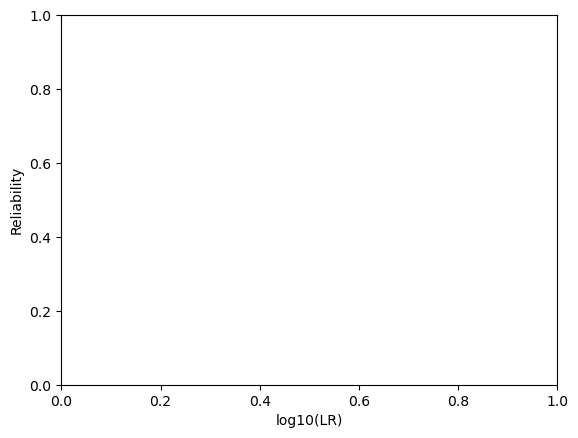

In [26]:
# Deduce binned reliability

# Show curve
# bLRcen = (bins[0:100]+bins[1:101]) / 2
fig = plt.figure()
ax = fig.add_subplot(111)
# h = ax.plot(bLRcen, Relbin, lw=2, label='Data')
# Overlay arctan function
Relmin = 0.2
Relmax = 1.05
# Relfit = np.minimum((Relmax+Relmin)/2 + (Relmax-Relmin)/np.pi * np.arctan(2*(bLRcen-1.2)), 1)
# ax.plot(bLRcen, Relfit, lw=2, label='Fit')
# ax.legend()
h = plt.xlabel('log10(LR)')
h = plt.ylabel('Reliability')